**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**September, 2023**



---

# Subset of data per infection

Subsets will be necessary for plots and cellphoneDB v4 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata

import seaborn as sns 

import matplotlib.pyplot as plt
import matplotlib as mpl
import gc

In [2]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1


'/opt/conda/bin/python'

### Note 
To run this chunk you need:

*rpy2==3.4.2  ///  anndata2ri==1.0.6*

In [3]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

dirname: Trying to get version of anndata2ri from dirname /opt/conda/lib/python3.8/site-packages
dirname: Failed; Does not match re.compile('anndata2ri-([\\d.]+?)(?:\\.dev(\\d+))?(?:[_+-]([0-9a-zA-Z.]+))?$')
git: Trying to get version from git in directory /opt/conda/lib/python3.8/site-packages
git: Failed; directory is not managed by git
metadata: Trying to get version for anndata2ri in dir /opt/conda/lib/python3.8/site-packages
metadata: Succeeded


In [4]:
def h5ad_cleaner(adata):
    #code to remove un-needed columns in obs. Helps to speed up the operability with R
    idx = ['sample', 'hpi', 'stage', '_scvi_labels', 'Tg_infected', 'leiden_scvi', 'souporcell_MFgenotype', 'MFgenotype', 'cell_type_broad','scrublet_score', 'scrublet_cluster_score', 'zscore', 
           'bh_pval', 'bonf_pval',  'percent_mito', 'n_counts', 'sample_barcode', 'assignment_SoC',
         'celltype_predictions', 'probabilities', 'scrublet_doublet', 'S_score', 'G2M_score', 'phase', 'n_genes', '_scvi_batch',
           '_scvi_local_l_mean', '_scvi_local_l_var',  'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 
           'total_counts_tg', 'pct_counts_tg', 'Tg_intracellular', 'cell_type_2022']
    
    for i in idx:
        try:
            del adata.obs[i]
        except:
            continue
    
    
    adata.obs['infection'] = adata.obs['infection'].astype(str)
    
    #removing these instances that make the function crash. Object must be clean
    del adata.obsm
    del adata.obsp
    del adata.layers
    del adata.uns
    
    
    #converting the count matrix to sparse
    adata.X = adata.X.toarray()
    
    return(adata)

## Loading data

In [5]:
adata= sc.read('../results/scVI/snRNA5_scVIintegrated_latent30_TrophoblastsRaw_20230825.h5ad')


### Setting up color palette for future plots

In [6]:
sc.set_figure_params(figsize=(5,5))

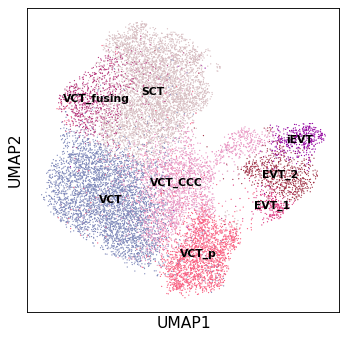

In [7]:
sc.pl.umap(adata, color=['cell_type'], size=5,
            title='', legend_loc='on data',legend_fontsize='x-small')

# Preparing subset objects for downstream analysis

## Subset Malaria infection assay only

In [8]:
adata_subset= adata[[ i in ["Pla_HDBR11923126","Pla_HDBR11923127","Pla_HDBR13026230",
                            "Pla_HDBR13026231","Pla_HDBR13026232","Pla_HDBR13026233","Pla_HDBR13661577"]  for i in adata.obs['sample']  ]]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [9]:
adata_subset.obs.donor_id

Pla_HDBR11923126_AAACCCATCGTCTACC    snDonor_Pf1
Pla_HDBR11923126_AAACGAATCGCAACAT    snDonor_Pf0
Pla_HDBR11923126_AAACGCTTCGGCACTG    snDonor_Pf1
Pla_HDBR11923126_AAAGAACAGCAGTACG    snDonor_Pf1
Pla_HDBR11923126_AAAGAACGTCCATAGT    snDonor_Pf1
                                        ...     
Pla_HDBR13026233_TTTGTTGAGAAACTGT    snDonor_Pf3
Pla_HDBR13026233_TTTGTTGAGAACGCGT    snDonor_Pf3
Pla_HDBR13026233_TTTGTTGAGTCGCCCA    snDonor_Pf2
Pla_HDBR13026233_TTTGTTGCAACTCATG    snDonor_Pf3
Pla_HDBR13026233_TTTGTTGCAGGTCCGT    snDonor_Pf3
Name: donor_id, Length: 15100, dtype: category
Categories (4, object): ['snDonor_Pf0', 'snDonor_Pf1', 'snDonor_Pf2', 'snDonor_Pf3']

#### Subset 24h

In [10]:
adata_d1 =adata_subset[[ i in ['24h'] for i in adata_subset.obs.hpi ]]
adata_d1.write ('../results/scVI/malaria_singleNuclei_24h.h5ad')

In [11]:
adata_d1.obs['stage_perInfection'].values.describe()

,counts,freqs
categories,,
Pf_24h,4929,0.5441
UI_Pf_24h,4130,0.4559


In [12]:
adata_d1.obs['donor_id'].values.describe()

,counts,freqs
categories,,
snDonor_Pf0,1740,0.192074
snDonor_Pf1,1686,0.186113
snDonor_Pf2,2460,0.271553
snDonor_Pf3,3173,0.350259


In [13]:
adata_d1= h5ad_cleaner(adata_d1)

Trying to set attribute `.obs` of view, copying.


In [14]:
%%R -i adata_d1

library(Seurat)
so = as.Seurat(adata_d1, counts = "X", data = "X")

saveRDS(so, file = "../results/scVI/malaria_singleNuclei_24h.rds")

#### Subset 48h

In [15]:
adata_d2 =adata_subset[[ i in ['48h'] for i in adata_subset.obs.hpi ]]
adata_d2.write ('../results/scVI/malaria_singleNuclei_48h.h5ad')

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [16]:
adata_d2.obs['stage_perInfection'].values.describe()

,counts,freqs
categories,,
Pf_48h,2468,0.408542
UI_Pf_48h,3573,0.591458


In [17]:
adata_d2.obs['donor_id'].values.describe()

,counts,freqs
categories,,
snDonor_Pf2,2589,0.428571
snDonor_Pf3,3452,0.571429


In [18]:
adata_d2= h5ad_cleaner(adata_d2)

Trying to set attribute `.obs` of view, copying.


In [19]:
%%R -i adata_d2

library(Seurat)
so = as.Seurat(adata_d2, counts = "X", data = "X")

saveRDS(so, file = "../results/scVI/malaria_singleNuclei_48h.rds")